In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Interpolation/CYBR/InterpolatedNumWeekCYBR.csv')

In [4]:
df

,DATES,U Revenue,D CR,U OE,D NOI,D CAPEX,D WK,U FCF
0,2017-10-01,10092.037283,1379.886116,8199.144561,564.009663,227.566414,58727.165046,7212.819152
1,2017-10-08,10070.427388,1377.187356,8119.283788,570.704109,228.642769,58191.151029,7163.547377
2,2017-10-15,10048.817492,1374.488595,8039.423016,577.398555,229.719124,57655.137013,7114.275602
3,2017-10-22,10027.207596,1371.789834,7959.562243,584.093001,230.795479,57119.122997,7065.003827
4,2017-10-29,10005.597701,1369.091073,7879.701471,590.787448,231.871833,56583.108980,7015.732052
...,...,...,...,...,...,...,...,...
114,2019-12-08,14726.113704,1728.394089,10213.845367,502.912020,392.326156,45274.001082,8002.624816
115,2019-12-15,14516.350702,1723.199930,10162.040609,502.912020,397.402339,46565.824725,8002.624816
116,2019-12-22,14306.587700,1718.005770,10110.235851,502.912020,402.478522,47857.648368,8002.624816
117,2019-12-29,14096.824699,1712.811611,10058.431093,502.912020,407.554705,49149.472012,8002.624816


In [5]:
df["U FCF"].mean()

7338.708562388612

In [6]:
dataset = df.values

In [7]:
dataset

array([['2017-10-01', 10092.0372833129, 1379.8861164764498,
        8199.14456073181, 564.009663037789, 227.56641388234902,
        58727.165045658396, 7212.81915238418],
       ['2017-10-08', 10070.427387689588, 1377.1873556912533,
        8119.283788268668, 570.7041091620431, 228.64276875525482,
        58191.15102933394, 7163.547377400193],
       ['2017-10-15', 10048.817492066275, 1374.4885949060574,
        8039.423015805529, 577.3985552862972, 229.71912362816056,
        57655.13701300947, 7114.275602416206],
       ['2017-10-22', 10027.207596442959, 1371.7898341208615,
        7959.562243342387, 584.0930014105513, 230.79547850106636,
        57119.12299668502, 7065.00382743222],
       ['2017-10-29', 10005.597700819648, 1369.0910733356652,
        7879.701470879247, 590.7874475348058, 231.8718333739721,
        56583.10898036055, 7015.732052448232],
       ['2017-11-05', 9983.987805196335, 1366.3923125504691,
        7799.840698416106, 597.4818936590598, 232.94818824687786,
    

In [8]:
X = dataset[:,1:7]
Y = dataset[:,7]
print(Y)

[7212.81915238418 7163.547377400193 7114.275602416206 7065.00382743222
 7015.732052448232 6966.460277464245 6917.188502480259 6867.916727496271
 6818.644952512284 6769.373177528299 6720.101402544312 6670.829627560323
 6621.557852576337 6572.28607759235 6544.004085723917 6515.722093855484
 6487.440101987051 6459.158110118618 6430.876118250186 6402.59412638175
 6374.3121345133195 6346.030142644885 6317.748150776451 6289.466158908019
 6261.184167039586 6232.902175171153 6204.62018330272 6311.760653598752
 6418.901123894781 6526.041594190811 6633.182064486843 6740.322534782874
 6847.463005078905 6954.603475374935 7061.743945670965 7168.884415966997
 7276.024886263029 7383.165356559059 7490.305826855089 7597.44629715112
 7608.992815745398 7620.539334339675 7632.085852933953 7643.6323715282315
 7655.178890122508 7666.725408716786 7678.271927311064 7689.818445905342
 7701.364964499619 7712.911483093896 7724.4580016881755 7736.004520282452
 7747.55103887673 7747.55103887673 7747.55103887673 77

In [9]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


In [10]:
X_scale

array([[9.13907695e-02, 2.19774222e-01, 4.36532407e-01, 7.13465329e-01,
        0.00000000e+00, 1.00000000e+00],
       [8.83801714e-02, 2.14446926e-01, 4.18394568e-01, 7.35506457e-01,
        5.81610747e-03, 9.87337542e-01],
       [8.53695733e-02, 2.09119629e-01, 4.00256728e-01, 7.57547586e-01,
        1.16322149e-02, 9.74675084e-01],
       [8.23589752e-02, 2.03792333e-01, 3.82118889e-01, 7.79588714e-01,
        1.74483224e-02, 9.62012626e-01],
       [7.93483771e-02, 1.98465036e-01, 3.63981049e-01, 8.01629843e-01,
        2.32644299e-02, 9.49350168e-01],
       [7.63377790e-02, 1.93137740e-01, 3.45843210e-01, 8.23670972e-01,
        2.90805374e-02, 9.36687710e-01],
       [7.33271808e-02, 1.87810443e-01, 3.27705371e-01, 8.45712100e-01,
        3.48966448e-02, 9.24025252e-01],
       [7.03165827e-02, 1.82483147e-01, 3.09567531e-01, 8.67753229e-01,
        4.07127523e-02, 9.11362794e-01],
       [6.73059846e-02, 1.77155851e-01, 2.91429692e-01, 8.89794357e-01,
        4.65288598e-02, 

In [11]:
X_scale[0]

array([0.09139077, 0.21977422, 0.43653241, 0.71346533, 0.        ,
       1.        ])

In [12]:
Y.tolist()

[7212.81915238418,
 7163.547377400193,
 7114.275602416206,
 7065.00382743222,
 7015.732052448232,
 6966.460277464245,
 6917.188502480259,
 6867.916727496271,
 6818.644952512284,
 6769.373177528299,
 6720.101402544312,
 6670.829627560323,
 6621.557852576337,
 6572.28607759235,
 6544.004085723917,
 6515.722093855484,
 6487.440101987051,
 6459.158110118618,
 6430.876118250186,
 6402.59412638175,
 6374.3121345133195,
 6346.030142644885,
 6317.748150776451,
 6289.466158908019,
 6261.184167039586,
 6232.902175171153,
 6204.62018330272,
 6311.760653598752,
 6418.901123894781,
 6526.041594190811,
 6633.182064486843,
 6740.322534782874,
 6847.463005078905,
 6954.603475374935,
 7061.743945670965,
 7168.884415966997,
 7276.024886263029,
 7383.165356559059,
 7490.305826855089,
 7597.44629715112,
 7608.992815745398,
 7620.539334339675,
 7632.085852933953,
 7643.6323715282315,
 7655.178890122508,
 7666.725408716786,
 7678.271927311064,
 7689.818445905342,
 7701.364964499619,
 7712.911483093896,
 772

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(95, 6) (12, 6) (12, 6) (95,) (12,) (12,)


In [15]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [16]:
model = Sequential([
    Dense(6, activation='elu', input_shape=(6,)),
    Dense(256, activation='elu'),
    Dense(256, activation='elu'),
    Dense(256, activation='elu'),
    Dense(256, activation='elu'),
    Dense(256, activation='elu'),
    Dense(256, activation='elu'),
    Dense(1, activation='elu'),
])

In [17]:
model.compile(optimizer='rmsprop',
              loss='mean_absolute_error')

In [18]:
hist = model.fit(X_train, Y_train, batch_size=4, epochs=400, validation_data=(X_val, Y_val))

Train on 95 samples, validate on 12 samples
Epoch 1/400
95/95 [==============================] - 1s 8ms/step - loss: 4056.5276 - val_loss: 1153.8479
Epoch 2/400
95/95 [==============================] - 0s 2ms/step - loss: 1087.7172 - val_loss: 924.8719
Epoch 3/400
95/95 [==============================] - 0s 2ms/step - loss: 955.3476 - val_loss: 955.1516
Epoch 4/400
95/95 [==============================] - 0s 2ms/step - loss: 784.9936 - val_loss: 1179.4360
Epoch 5/400
95/95 [==============================] - 0s 2ms/step - loss: 827.4534 - val_loss: 1301.1202
Epoch 6/400
95/95 [==============================] - 0s 2ms/step - loss: 738.7055 - val_loss: 1626.6058
Epoch 7/400
95/95 [==============================] - 0s 2ms/step - loss: 700.0392 - val_loss: 618.9792
Epoch 8/400
95/95 [==============================] - 0s 2ms/step - loss: 722.6656 - val_loss: 714.3039
Epoch 9/400
95/95 [==============================] - 0s 2ms/step - loss: 681.2717 - val_loss: 458.3042
Epoch 10/400
95/95 [===

95/95 [==============================] - 0s 2ms/step - loss: 358.0652 - val_loss: 206.7611
Epoch 80/400
95/95 [==============================] - 0s 2ms/step - loss: 335.7644 - val_loss: 366.0830
Epoch 81/400
95/95 [==============================] - 0s 2ms/step - loss: 322.4630 - val_loss: 531.9734
Epoch 82/400
95/95 [==============================] - 0s 2ms/step - loss: 327.2875 - val_loss: 946.0454
Epoch 83/400
95/95 [==============================] - 0s 2ms/step - loss: 316.1218 - val_loss: 335.3403
Epoch 84/400
95/95 [==============================] - 0s 2ms/step - loss: 307.1908 - val_loss: 623.0256
Epoch 85/400
95/95 [==============================] - 0s 1ms/step - loss: 304.5705 - val_loss: 692.4335
Epoch 86/400
95/95 [==============================] - 0s 2ms/step - loss: 289.9373 - val_loss: 205.3848
Epoch 87/400
95/95 [==============================] - 0s 2ms/step - loss: 325.2505 - val_loss: 187.1146
Epoch 88/400
95/95 [==============================] - 0s 2ms/step - loss: 305

95/95 [==============================] - 0s 2ms/step - loss: 233.7199 - val_loss: 291.5844
Epoch 158/400
95/95 [==============================] - 0s 2ms/step - loss: 228.4786 - val_loss: 401.6755
Epoch 159/400
95/95 [==============================] - 0s 2ms/step - loss: 394.7188 - val_loss: 264.4053
Epoch 160/400
95/95 [==============================] - 0s 2ms/step - loss: 191.0113 - val_loss: 266.9406
Epoch 161/400
95/95 [==============================] - 0s 2ms/step - loss: 243.0716 - val_loss: 449.3403
Epoch 162/400
95/95 [==============================] - 0s 2ms/step - loss: 259.7029 - val_loss: 82.5764
Epoch 163/400
95/95 [==============================] - 0s 2ms/step - loss: 237.1512 - val_loss: 124.6379
Epoch 164/400
95/95 [==============================] - 0s 2ms/step - loss: 233.7978 - val_loss: 299.4045
Epoch 165/400
95/95 [==============================] - 0s 2ms/step - loss: 217.6857 - val_loss: 93.4268
Epoch 166/400
95/95 [==============================] - 0s 2ms/step - lo

Epoch 235/400
95/95 [==============================] - 0s 2ms/step - loss: 204.8849 - val_loss: 389.3264
Epoch 236/400
95/95 [==============================] - 0s 2ms/step - loss: 225.7896 - val_loss: 216.8826
Epoch 237/400
95/95 [==============================] - 0s 2ms/step - loss: 202.9163 - val_loss: 258.0209
Epoch 238/400
95/95 [==============================] - 0s 2ms/step - loss: 208.2898 - val_loss: 391.1470
Epoch 239/400
95/95 [==============================] - 0s 2ms/step - loss: 225.3392 - val_loss: 236.1792
Epoch 240/400
95/95 [==============================] - ETA: 0s - loss: 211.483 - 0s 2ms/step - loss: 208.9267 - val_loss: 264.4214
Epoch 241/400
95/95 [==============================] - 0s 2ms/step - loss: 224.0104 - val_loss: 116.9385
Epoch 242/400
95/95 [==============================] - 0s 1ms/step - loss: 222.1394 - val_loss: 307.2362
Epoch 243/400
95/95 [==============================] - 0s 2ms/step - loss: 214.2933 - val_loss: 160.7687
Epoch 244/400
95/95 [========

Epoch 313/400
95/95 [==============================] - 0s 1ms/step - loss: 201.1845 - val_loss: 288.7209
Epoch 314/400
95/95 [==============================] - 0s 1ms/step - loss: 217.7767 - val_loss: 206.1388
Epoch 315/400
95/95 [==============================] - 0s 1ms/step - loss: 216.2034 - val_loss: 101.3847
Epoch 316/400
95/95 [==============================] - 0s 1ms/step - loss: 193.7820 - val_loss: 376.7196
Epoch 317/400
95/95 [==============================] - 0s 1ms/step - loss: 202.8375 - val_loss: 180.0164
Epoch 318/400
95/95 [==============================] - 0s 1ms/step - loss: 202.4376 - val_loss: 104.6179
Epoch 319/400
95/95 [==============================] - 0s 1ms/step - loss: 194.9551 - val_loss: 246.6532
Epoch 320/400
95/95 [==============================] - 0s 1ms/step - loss: 205.7886 - val_loss: 268.3693
Epoch 321/400
95/95 [==============================] - 0s 1ms/step - loss: 202.8814 - val_loss: 80.6980
Epoch 322/400
95/95 [==============================] - 0

95/95 [==============================] - 0s 1ms/step - loss: 196.4026 - val_loss: 150.8250
Epoch 392/400
95/95 [==============================] - 0s 1ms/step - loss: 181.4380 - val_loss: 89.3500
Epoch 393/400
95/95 [==============================] - 0s 1ms/step - loss: 208.1547 - val_loss: 148.8111
Epoch 394/400
95/95 [==============================] - 0s 1ms/step - loss: 183.0269 - val_loss: 166.3735
Epoch 395/400
95/95 [==============================] - 0s 1ms/step - loss: 195.9865 - val_loss: 53.6401
Epoch 396/400
95/95 [==============================] - 0s 1ms/step - loss: 187.4194 - val_loss: 150.3385
Epoch 397/400
95/95 [==============================] - 0s 1ms/step - loss: 182.4722 - val_loss: 292.4054
Epoch 398/400
95/95 [==============================] - 0s 1ms/step - loss: 170.1993 - val_loss: 264.2735
Epoch 399/400
95/95 [==============================] - 0s 1ms/step - loss: 202.9745 - val_loss: 312.5176
Epoch 400/400
95/95 [==============================] - 0s 1ms/step - lo

In [19]:
import matplotlib.pyplot as plt

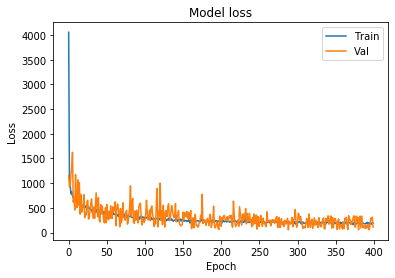

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [21]:
# serialize model to JSON
model_json = model.to_json()
with open("modelnum.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("modelnum.h5")
print("Saved model to disk")

Saved model to disk


In [22]:
from numpy import array
Xnew = array([[0.38259114, 0.2897271 , 0.61579353, 0.10559242, 0.36690397,
        0.99604307]])
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s"%(Xnew[0], ynew[0]))

X=[0.38259114 0.2897271  0.61579353 0.10559242 0.36690397 0.99604307], Predicted=[7869.0825]


In [23]:
from sklearn.metrics import r2_score

In [24]:
Xnew = array([[0.38259114, 0.2897271 , 0.61579353, 0.10559242, 0.36690397,
        0.99604307]])
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s"%(Xnew[0], ynew[0]))

X=[0.38259114 0.2897271  0.61579353 0.10559242 0.36690397 0.99604307], Predicted=[7869.0825]


In [25]:
print(Xnew)

[[0.38259114 0.2897271  0.61579353 0.10559242 0.36690397 0.99604307]]


In [26]:
Xnew = array([[X_scale[0][0], X_scale[0][1] , X_scale[0][2], X_scale[0][3], X_scale[0][4],
        X_scale[0][5]]])
print(Xnew)
print(len(X_scale))

[[0.09139077 0.21977422 0.43653241 0.71346533 0.         1.        ]]
119


In [27]:
import numpy as np
from numpy import array
arr = []
for x in range(len(X_scale)):
    Xnew = array([[X_scale[x][0], X_scale[x][1] , X_scale[x][2], X_scale[x][3], X_scale[x][4], X_scale[x][5]]])
    ynew = model.predict(Xnew)
    #print(ynew[0][0])
    arr.append(ynew[0][0])
array = np.array(arr)

In [28]:
array.tolist()

[7249.1953125,
 7183.28662109375,
 7113.98095703125,
 7041.68408203125,
 6971.59228515625,
 6906.44140625,
 6850.34423828125,
 6803.52880859375,
 6765.64501953125,
 6740.39697265625,
 6724.14453125,
 6697.22021484375,
 6626.009765625,
 6551.5458984375,
 6536.15966796875,
 6519.8388671875,
 6502.4892578125,
 6483.97802734375,
 6464.197265625,
 6443.27294921875,
 6421.5283203125,
 6398.91064453125,
 6375.904296875,
 6353.43505859375,
 6332.50927734375,
 6314.8251953125,
 6301.498046875,
 6344.6357421875,
 6391.31982421875,
 6444.06201171875,
 6505.677734375,
 6579.31298828125,
 6662.21826171875,
 6749.11083984375,
 6839.75,
 6934.6181640625,
 7033.34228515625,
 7132.162109375,
 7227.2763671875,
 7317.26171875,
 7363.10302734375,
 7406.056640625,
 7446.29248046875,
 7483.955078125,
 7517.0712890625,
 7542.10400390625,
 7561.50048828125,
 7577.02392578125,
 7589.7080078125,
 7600.40478515625,
 7609.6865234375,
 7617.84375,
 7625.0712890625,
 7632.48193359375,
 7639.6962890625,
 7646.716308

In [29]:
r2_score(Y.tolist(), array.tolist())

0.9744530178621269